# Facebook Prophet

In [3]:
!pip install pystan

INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/16.2 MB 1.1 MB/s eta 0:00:15
     --------------------------------------- 0.1/16.2 MB 787.7 kB/s eta 0:00:21
     --------------------------------------- 0.1/16.2 MB 853.3 kB/s eta 0:00:19
     --------------------------------------- 0.2/16.2 MB 876.1 kB/s eta 0:00:19
   

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [4 lines of output]
  C:\Users\yuvar\AppData\Local\Temp\pip-install-hqq846wn\pystan_807b0f3498ed48b79ca98f3d58cc862d\setup.py:61: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
    self.version = node.value.s
  Cython>=0.22 and NumPy are required.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects


In [4]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:11
   ---------------------------------------- 0.2/13.3 MB 1.3 MB/s eta 0:00:11
    --------------------------------------- 0.2/13.3 MB 1.3 MB/s eta 0:00:10
    --------------------------------------- 0.3/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.3/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.4/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.5/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.6/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.6/13.3 MB 1.4 MB/s eta 0:00:10
   - -------------------------------------- 0.7/13.3 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.7/13.3 MB 1.3 MB/s eta 0:00:10
   -- -------

In [9]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [18]:
data = pd.read_csv('coin_Bitcoin.csv')
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [26]:
data = data.rename(columns={'Close':'y','Date':'ds'})
data['y_orig'] = data['y']
data['y'] = np.log(data['y'])

In [28]:
model = Prophet()
model.fit(data)

10:56:58 - cmdstanpy - INFO - Chain [1] start processing
10:57:00 - cmdstanpy - INFO - Chain [1] done processing


In [108]:
''' 'year':'A',
    'quarter':'Q',
    'month':'M',
    'day': 'D'
    'hour':'H',
    'second':'S',
    'millisecond': 'L',
    'microsecond': 'U',
    'nanosecond':'N'}

'''

#future_data = model.make_dataframe(periods=6, freq='H')
future_data = model.make_future_dataframe(periods=12, freq = 'M') #3 years prediction

C:\Users\yuvar\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [110]:
forecast_data = model.predict(future_data)

In [112]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
2993,2021-09-30 23:59:59,10.936425,10.581015,11.325938
2994,2021-10-31 23:59:59,11.259132,10.858869,11.734971
2995,2021-11-30 23:59:59,11.587542,11.005220,12.256331
2996,2021-12-31 23:59:59,11.738745,10.889811,12.683834
2997,2022-01-31 23:59:59,11.717567,10.680229,12.898067
2998,2022-02-28 23:59:59,11.853644,10.524366,13.299945
2999,2022-03-31 23:59:59,11.766295,10.184841,13.473466
3000,2022-04-30 23:59:59,11.901134,9.964401,13.996205
3001,2022-05-31 23:59:59,12.033784,9.737622,14.546086
3002,2022-06-30 23:59:59,12.082959,9.574689,14.837500


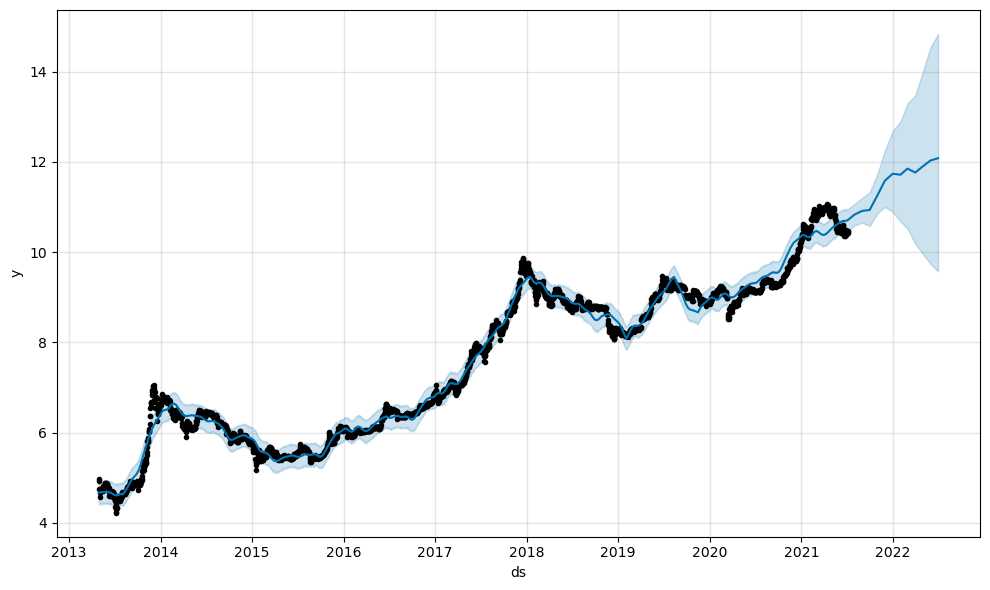

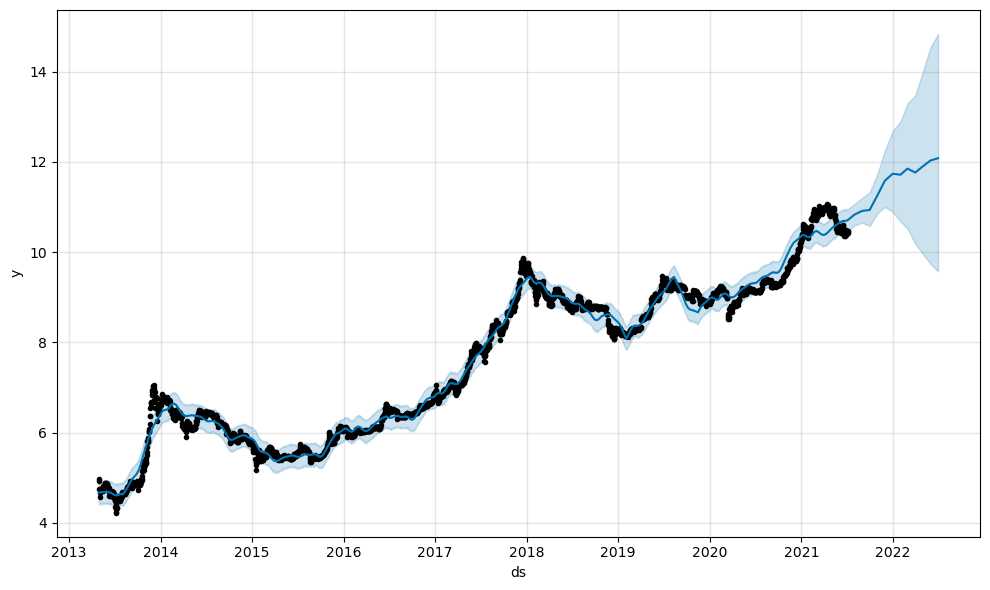

In [114]:
model.plot(forecast_data)

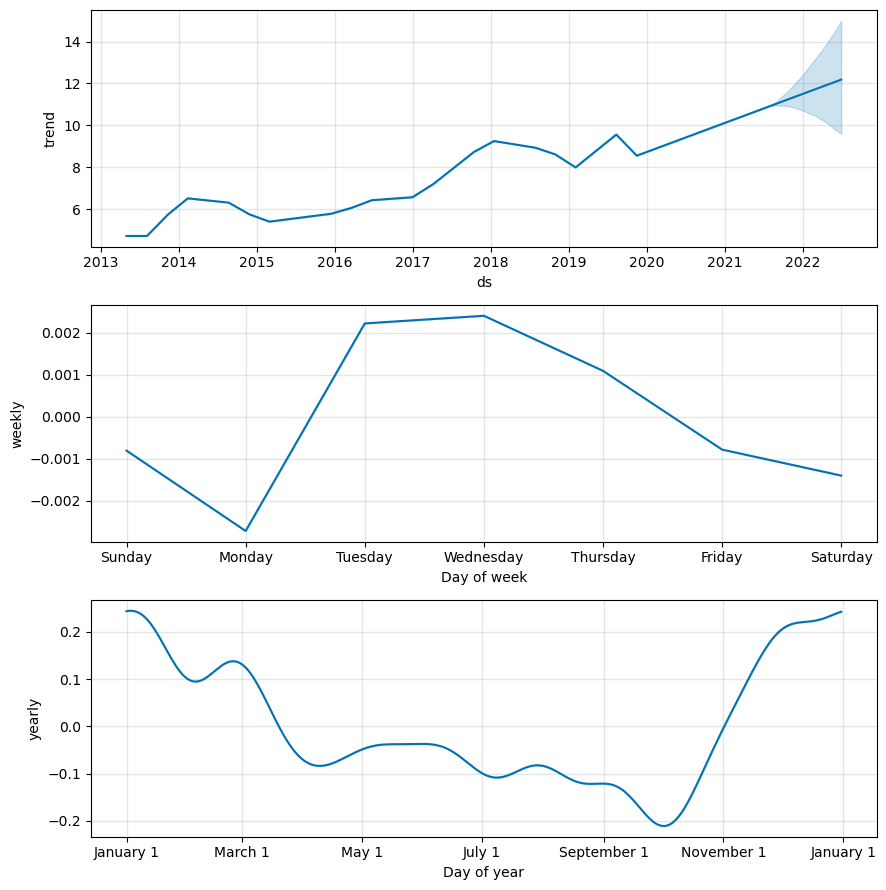

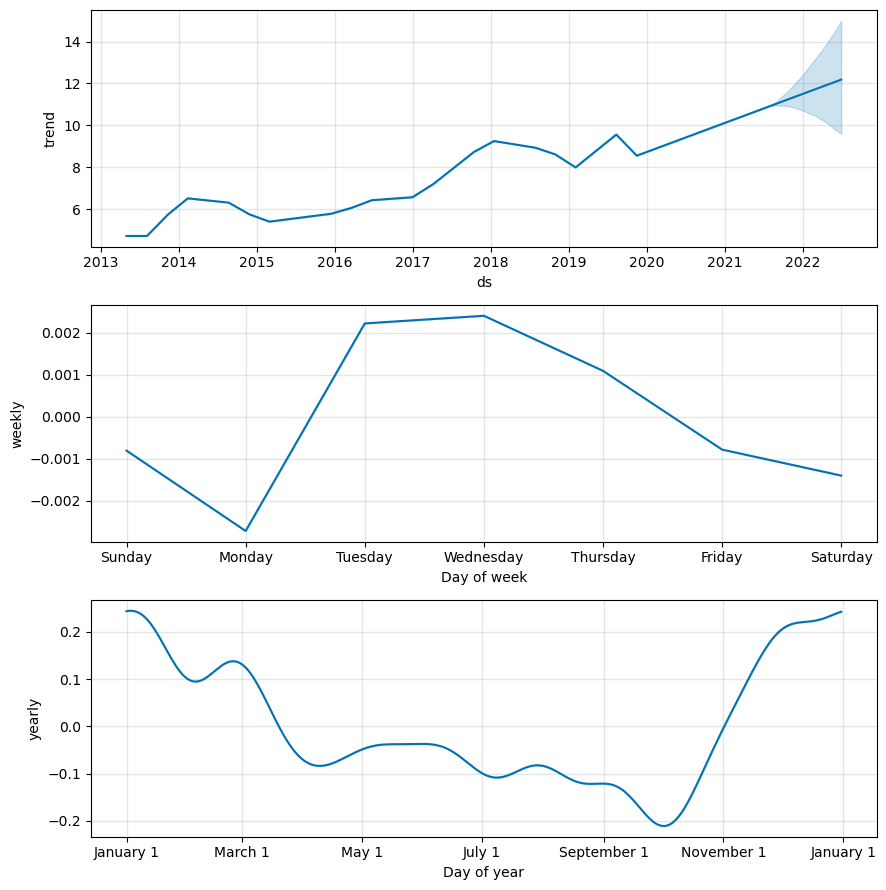

In [116]:
model.plot_components(forecast_data)

In [118]:
forecast_data_orig = forecast_data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])#lograthamic transformation
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

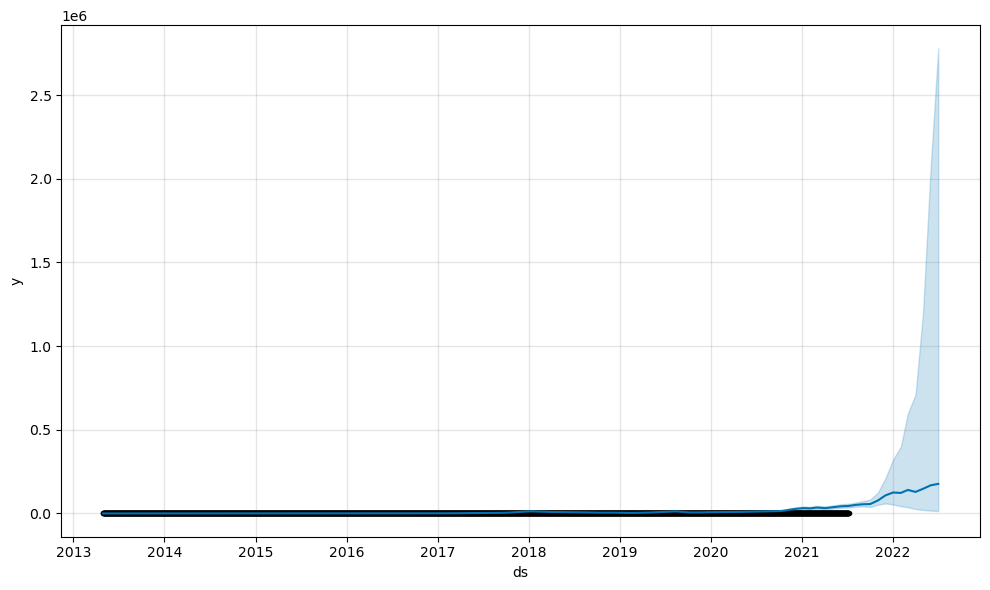

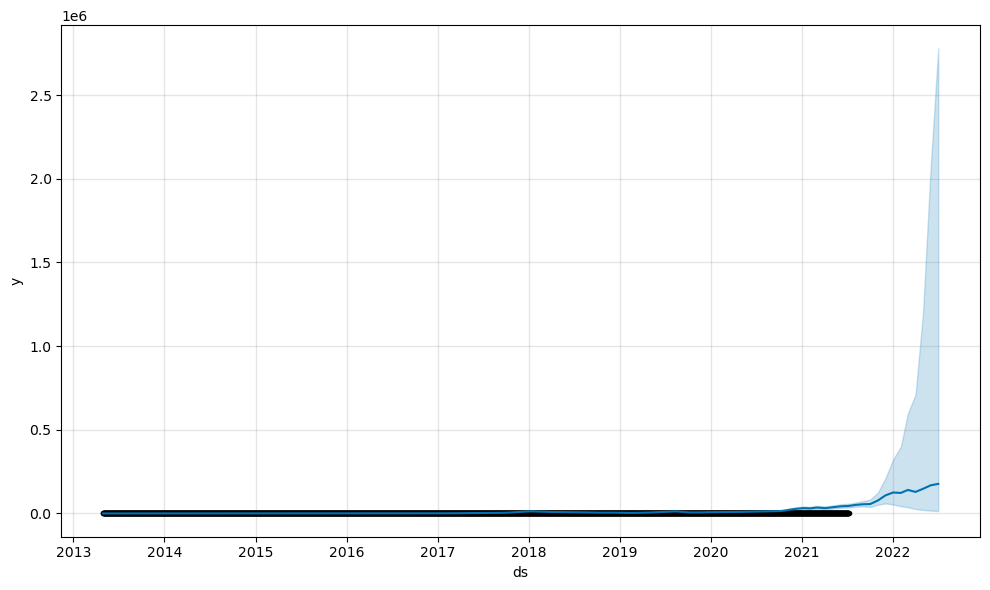

In [120]:
model.plot(forecast_data_orig)

In [128]:
data['y_log'] = data['y'] # copy the log_transformed data to another column
data['y']=data['y_orig']


In [180]:
final_data = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=data["y_orig"],name="Actual")
predict_chart = go.Scatter(y=final_data["yhat"], name ="Predicted")
predict_chart_upper = go.Scatter(y=final_data["yhat_upper"], name="Predicted Upper")
predict_chart_lower = go.Scatter(y=final_data["yhat_lower"], name ="Predicted Lower")
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [106]:
final_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2992,2023-12-31 23:59:59,14.261868,inf,inf,6.633883,22.234113,0.240417,0.240417,0.240417,-0.002720,-0.002720,-0.002720,0.243137,0.243137,0.243137,0.0,0.0,0.0,inf
2993,2025-12-31 23:59:59,17.030985,4.885163e+05,inf,2.311918,32.058513,0.244698,0.244698,0.244698,0.001091,0.001091,0.001091,0.243606,0.243606,0.243606,0.0,0.0,0.0,inf
2994,2027-12-31 23:59:59,19.796313,1.016459e+00,inf,-4.269341,43.248227,0.241736,0.241736,0.241736,-0.001401,-0.001401,-0.001401,0.243137,0.243137,0.243137,0.0,0.0,0.0,15.853530
2995,2029-12-31 23:59:59,22.565429,1.000004e+00,inf,-12.658537,55.139548,0.245825,0.245825,0.245825,0.002219,0.002219,0.002219,0.243606,0.243606,0.243606,0.0,0.0,0.0,15.154439
2996,2031-12-31 23:59:59,25.330758,1.000000e+00,inf,-21.408433,69.528438,0.244228,0.244228,0.244228,0.001091,0.001091,0.001091,0.243137,0.243137,0.243137,0.0,0.0,0.0,15.154262
